# **Leega - Titanic**
### Contexto
O naufrágio do Titanic é um dos naufrágios mais famosos da história.

A 15 de Abril de 1912, durante a sua viagem inaugural, o amplamente
considerado " inafundável" RMS Titanic afundou-se após colidir com um
iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a
bordo, resultando na morte de 1502 dos 2224 passageiros e tripulação.

Embora houvesse algum elemento de sorte envolvido na sobrevivência,
parece que alguns grupos de pessoas tinham mais probabilidades de
sobreviver do que outros.

Neste desafio, devemos gerar algumas informações para que possamos analisar e responder à
pergunta: "que tipos de pessoas tinham mais probabilidades de
sobreviver", utilizando dados sobre passageiros (ou seja, nome, idade, sexo,
classe socioeconómica etc.).

Teremos acesso a dois conjuntos de dados semelhantes que incluem
informações sobre passageiros como nome, idade, sexo, classe social, etc.
Um conjunto de dados intitula-se train.csv e o outro test.csv.

O arquivo Train.csv conterá os detalhes de um subconjunto dos passageiros
a bordo (891 para ser exato) e, mais importante ainda, revelará se
sobreviveram ou não, também conhecido como a "verdade em terra".
O conjunto de dados test.csv contém informações semelhantes, mas não
revela a "verdade em terra" para cada passageiro.

Utilizando os padrões encontrados nos dados do train.csv, iremos indicar quais dos outros 418 passageiros a bordo
(encontrados em test.csv) sobreviriam!


Grupo 6:
- Andrea Weber
- Elian Rodrigues
- Gustavo Klein
- Ranon Diniz
- Marcus Vinicius


### Explorando os Dados

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

Identificamos valores ***NULOS*** no campo Age, Cabin e Embarked neste Dataframe

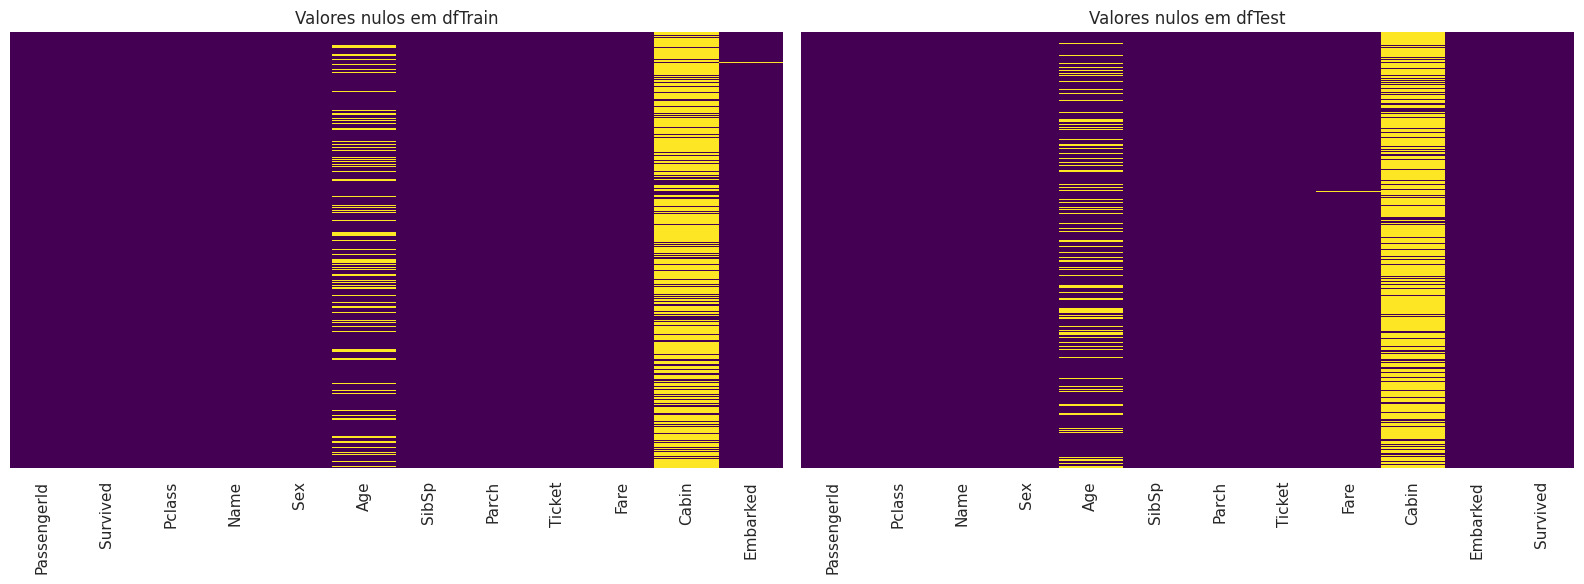

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for dfTrain
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False, ax=axes[0])
axes[0].set_title('Valores nulos em dfTrain')

# Heatmap for dfTest
sns.heatmap(df2.isnull(), cmap='viridis', cbar=False, yticklabels=False, ax=axes[1])
axes[1].set_title('Valores nulos em dfTest')

plt.tight_layout()
plt.show()

In [ ]:
null_counts = df.isnull().sum()

# Exibir os resultados
print("Quantidade de valores nulos por coluna:")
print(null_counts)

null_counts = df2.isnull().sum()

# Exibir os resultados
print("Quantidade de valores nulos por coluna:")
print(null_counts)

Quantidade de valores nulos por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Quantidade de valores nulos por coluna:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [ ]:
print('Value counts coluna Survived')
print(df['Survived'].value_counts())
print('Value counts coluna Pclass')
print(df['Pclass'].value_counts())
print('Value counts coluna Sex')
print(df['Sex'].value_counts())

Value counts coluna Survived
0    549
1    342
Name: Survived, dtype: int64
Value counts coluna Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
Value counts coluna Sex
male      577
female    314
Name: Sex, dtype: int64


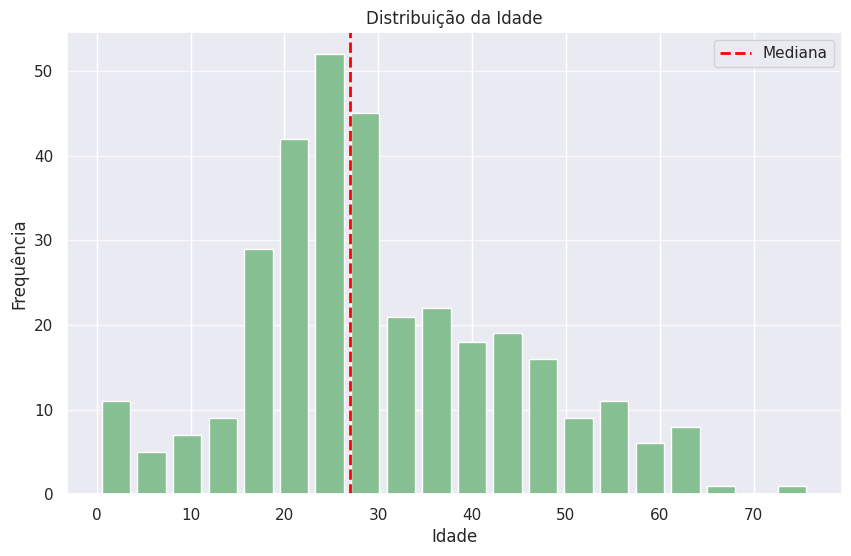

A mediana da coluna 'Age' é: 27.0


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df2['Age'].dropna(), bins=20, color='#86bf91', rwidth=0.8)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)

# Adicionar uma linha para indicar a mediana
plt.axvline(df2['Age'].median(), color='red', linestyle='dashed', linewidth=2, label='Mediana')

plt.legend()
plt.show()

# Imprimir a mediana
print(f"A mediana da coluna 'Age' é: {df2['Age'].median()}")

Identificamos valores ***NULOS*** em Age, Cabin, Embarked e Fare neste Dataframe.

# Calculando a Sobrevivência




In [ ]:
#Definimos as funções que iremos usar
def logistica(series):
    X = -1.33
    #Sexo
    if(series.iloc[0] == 1):
        X += 2.55
    #2 Classe
    if(series.iloc[1]== 2):
        X += 1.27
    #1 Classe
    if(series.iloc[1] == 1):
        X += 2.58
    X -= (0.04 * series.iloc[2])
    return X

def regressaoLogistica(series):
    exp = np.exp(logistica(series))
    return (exp/(1 + exp))

def returnDf(df):
    data = []
    limite = 0.5
    for i in range(len(df)):
        data.append(regressaoLogistica(df.iloc[i]))

    dfRegressao =  pd.DataFrame({'Regressao': data})

    dfRegressao['Regressao'] = (dfRegressao['Regressao'] >= limite).astype(int)
    return dfRegressao

In [ ]:
dfTest = pd.read_csv('test.csv')
#Pegamos somente as colunas que iremos usar
columns_to_keep = ['Sex', 'Pclass', 'Age']
dfTest = dfTest[columns_to_keep]

#Aplicamos a Mediana na idade
dfTest['Age'].fillna(dfTest['Age'].median())
#Mapeamos o sexo para calcular
sex_mapping = {'male': 0, 'female': 1}
dfTest['Sex'] = dfTest['Sex'].map(sex_mapping)

#Adicionamos a coluna de resultado
dfTest['Survived'] = ''
dfFinal = returnDf(dfTest)

#Aplicamos os resultados no DF original
dfSaida = pd.read_csv('test.csv')
dfSaida['Survived'] = dfFinal['Regressao']

#Geramos o arquivo com sobreviventes
csv_file_path = 'test.csv'
dfSaida.to_csv(csv_file_path, index=False)

In [ ]:
print('sobreviveu Teste',len(dfSaida[dfSaida['Survived'] == 1]))
print('sobreviveriam Train',len(df[df['Survived'] == 1]))
print('morreu Teste',len(dfSaida[dfSaida['Survived'] == 0]))
print('morriam Train',len(df[df['Survived'] == 0]))

sobreviveu Teste 132
sobreviveriam Train 342
morreu Teste 286
morriam Train 549


# Breve Analise dos Dados e Junção dos DataFrames

Lembrando que ainda temos valores nulos em Cabin e Fare, mas como não iremos utilizar estes dados para o que foi pedido, não há necessidade de trata-los para visualização

In [ ]:
#Adicionaremos uma coluna para identificar se o dado é da base original ou da base que fizemos a predição
#Falar de cada variavel e botar um heatmap
df['base'] = 'Original'
dfSaida['base'] = 'Predição'
#Criamos o Dataframe completo
df3 = pd.concat([df, dfSaida])
#Embarked N para categorizar como Não informado

#Valores Binarios alterados para String para melhor compreensão
df3['Survived'] = df3['Survived'].map({1: 'Sobreviveu', 0: 'Não Sobreviveu'})
df3['Pclass'] = df3['Pclass'].map({1: '1a Classe', 2: '2a Classe', 3: '3a Classe'})


#**Funções de Plot**

## **Plot 1**

In [ ]:
def questao1(dfEmbarcado):
    embarked_percentage = dfEmbarcado['Embarked'].value_counts(normalize=True) * 100

    # Definir um estilo de fundo branco e esquema de cores
    sns.set(style="whitegrid", palette="viridis")

    # Criar um gráfico de barras horizontal
    plt.figure(figsize=(10, 6))
    sns.barplot(x=embarked_percentage.values, y=embarked_percentage.index, hue=embarked_percentage.index, dodge=False, legend=False)

    # Adicionar rótulos e título
    plt.xlabel('Porcentagem')
    plt.ylabel('Porto de Embarque')
    plt.title('Porcentual de Embarques por Porto')

    # Adicionar percentagens no gráfico
    for i, percentage in enumerate(embarked_percentage):
        plt.text(percentage + 1, i, f'{percentage:.2f}%', va='center', fontsize=10)

    # Remover a borda superior e direita do gráfico
    sns.despine()

    # Exibir o gráfico
    plt.show()

##**Plot 2**

In [ ]:
def questao2(df3):
  #dados e configurações
  classe_counts = df3['Pclass'].value_counts()
  labels = ['3ª Classe', '2ª Classe', '1ª Classe']
  sizes = classe_counts.values
  sns.set_style("darkgrid")
  cores_personalizadas = ['#1b263b', '#415a77', '#778da9']
  cores_ciclicas = sns.color_palette(cores_personalizadas * (len(labels) // len(cores_personalizadas) + 1))
  explode = (0.1, 0, 0)
  pctdistance = 0.80

  # Criar o gráfico de pizza
  plt.figure(figsize=(8, 6))
  patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=0, colors=cores_ciclicas, explode=explode, shadow=True, wedgeprops=dict(width=0.4), pctdistance=pctdistance)

  # Alterar a cor das porcentagens para '#e0e1dd'
  for autotext in autotexts:
      autotext.set_color('#e0e1dd')

  # Adicionar cor de fundo
  plt.gca().set_facecolor('#1b263b')

  # Adicionar a legenda com o número de pessoas
  legend_labels = [f'{label} ({count})' for label, count in zip(labels, sizes)]
  plt.legend(legend_labels, loc='best', fontsize='medium', frameon=False, bbox_to_anchor=(1, 0.5))

  plt.title('Percentual e Número de Pessoas por Classe')
  plt.rcParams['font.size'] = 12
  plt.axis('equal')

  # Mostrar o gráfico
plt.show()

## **Plot 3**

In [ ]:
def questao3(df3):
  # Dados
  sibsp_counts = df3['SibSp'].value_counts().sort_index()
  labels = sibsp_counts.index.astype(str)
  values = sibsp_counts.values

  # Definir estilo do Seaborn
  sns.set_style("darkgrid")

  # Paleta de cores personalizada para as barras
  cores_personalizadas = ['#1b263b', '#415a77', '#778da9', '#e0e1dd']

  # Criar paleta de cores cíclica para repetir as cores
  cores_ciclicas = sns.color_palette(cores_personalizadas * (len(labels) // len(cores_personalizadas) + 1))

  # Criar o gráfico de barras
  plt.figure(figsize=(10, 6))
  bars = plt.bar(labels, values, color=cores_ciclicas)

  # Adicionar os valores totais sobre as barras
  for bar, value in zip(bars, values):
      plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

  plt.title('Número de Irmãos e Cônjuges a Bordo')
  plt.xlabel('Número de Irmãos e Cônjuges')
  plt.ylabel('Número de Passageiros')
  plt.gca().xaxis.grid(False)  # Remover grid do eixo Y
  plt.show()

##**Plot 4**

In [ ]:
def questao4(df3):
  # Dados
  parch_counts = df3['Parch'].value_counts().sort_index()
  labels = parch_counts.index.astype(str)
  values = parch_counts.values

  # Definir estilo do Seaborn
  sns.set_style("darkgrid")

  # Paleta de cores personalizada para as barras
  cores_personalizadas = ['#1b263b', '#415a77', '#778da9', '#e0e1dd']

  # Criar paleta de cores cíclica para repetir as cores
  cores_ciclicas = sns.color_palette(cores_personalizadas * (len(labels) // len(cores_personalizadas) + 1))

  # Criar o gráfico de barras
  plt.figure(figsize=(10, 6))
  bars = plt.bar(labels, values, color=cores_ciclicas)

  # Adicionar os valores totais sobre as barras
  for bar, value in zip(bars, values):
      plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

  plt.title('Número de Pais e Filhos a Bordo')
  plt.xlabel('Número de Pais e Filhos')
  plt.ylabel('Número de Passageiros')

  # Remover grid do eixo Y
  plt.gca().xaxis.grid(False)

  # Mostrar o gráfico
  plt.show()

##**Plot 5**

In [ ]:
def questao5(df, missing_age_values):
    plt.figure(figsize=(12, 6))

    # Filtrar e pintar barras menores que 0 em azul
    sns.histplot(data=df[df['Age'] >= 0], x='Age', bins=20, kde=True, color='#6495ED', label='Número de Passageiros')  # Use '#6495ED' for a less saturated blue

    # Adicionar barras vermelhas para os valores de missing_age_values
    plt.hist(missing_age_values, bins=30, color='#FF0000', alpha=0.9, label='Idades Ausentes', width=2.3)  # Ajuste alpha para tornar a barra menos transparente

    # Adicionar linha para a média de idade
    mean_age = df['Age'].mean()

    # Configurações do gráfico
    plt.title('Número de Passageiros por Idade')
    plt.xlabel('Idade')
    plt.ylabel('Número de Passageiros')
    plt.legend()

    # Mostrar o gráfico
    plt.show()

## **Plot 6**

In [ ]:
def questao6(df, dfSaida):
    # Paleta de cores personalizada
    cores_personalizadas = ['#cc2b2b', '#25b033', '#778da9', '#e0e1dd']

    # Sobreviventes
    sobreviventes_counts = df['Survived'].value_counts()
    percentuais = sobreviventes_counts / sobreviventes_counts.sum() * 100

    # Criar o gráfico de barras com a paleta de cores personalizada
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plotando o primeiro gráfico
    axs[0].bar('Não Sobreviveu', sobreviventes_counts[0], color=cores_personalizadas[0], label=f'Não Sobreviveu')
    axs[0].bar('Sobreviveu', sobreviventes_counts[1], color=cores_personalizadas[1], label=f'Sobreviveu')
    axs[0].set_title('Taxa de Sobrevivência Real')
    axs[0].set_xlabel('Sobrevivência')
    axs[0].set_ylabel('Número de Passageiros')
    axs[0].legend()
    axs[0].grid(axis='x')

    # Adicionar a porcentagem acima de cada barra no primeiro gráfico
    for i, valor in enumerate(sobreviventes_counts):
        axs[0].text(i, valor, f'{percentuais[i]:.2f}%', ha='center', va='bottom')

    # Sobreviventes na saída
    sobreviventes_counts_saida = dfSaida['Survived'].value_counts()
    percentuais_saida = sobreviventes_counts_saida / sobreviventes_counts_saida.sum() * 100

    # Plotando o segundo gráfico
    axs[1].bar('Não Sobreviveriam', sobreviventes_counts_saida[0], color=cores_personalizadas[0], label=f'Não Sobreviveriam')
    axs[1].bar('Sobreviveriam', sobreviventes_counts_saida[1], color=cores_personalizadas[1], label=f'Sobreviveriam')
    axs[1].set_title('Possivel Taxa de Sobrevivencia')
    axs[1].set_xlabel('Sobrevivência')
    axs[1].set_ylabel('Número de Passageiros')
    axs[1].legend()
    axs[1].grid(axis='x')

    # Adicionar a porcentagem acima de cada barra no segundo gráfico
    for i, valor in enumerate(sobreviventes_counts_saida):
        axs[1].text(i, valor, f'{percentuais_saida[i]:.2f}%', ha='center', va='bottom')

    # Mostrando a figura com os dois subplots
    plt.show()

## **Plot 7**

In [ ]:
def questao7(df, dfSaida):
    # Paleta de cores personalizada
    cores_personalizadas = ['#cc2b2b', '#25b033', '#778da9', '#e0e1dd']

    # Contagem de passageiros por classe
    passageiros_por_classe = df['Pclass'].value_counts().sort_index()

    # Contagem de sobreviventes por classe
    sobreviventes_por_classe = df.groupby('Pclass')['Survived'].sum().sort_index()

    # Contagem de não sobreviventes por classe
    nao_sobreviventes_por_classe = passageiros_por_classe - sobreviventes_por_classe

    # Criar o gráfico de barras com o estilo personalizado
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plotando o primeiro gráfico
    bars1 = axs[0].bar(passageiros_por_classe.index, nao_sobreviventes_por_classe, color=cores_personalizadas[0], label='Não Sobreviventes')
    bars2 = axs[0].bar(passageiros_por_classe.index, sobreviventes_por_classe, bottom=nao_sobreviventes_por_classe, color=cores_personalizadas[1], label='Sobreviventes')
    axs[0].set_title('Taxa de Sobreviventes por Classe Real')
    axs[0].set_ylabel('Número de Passageiros')
    axs[0].set_xticks(passageiros_por_classe.index)
    axs[0].set_xticklabels(['1ª Classe', '2ª Classe', '3ª Classe'])
    axs[0].legend()
    axs[0].grid(axis='x')

    # Adicionar porcentagem dentro de cada barra no primeiro gráfico
    for bar1, bar2, total in zip(bars1, bars2, passageiros_por_classe):
        axs[0].text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() / 2, f'{(bar1.get_height() / total * 100):.2f}%', color=cores_personalizadas[3], ha='center', va='center')
        axs[0].text(bar2.get_x() + bar2.get_width() / 2, bar1.get_height() + bar2.get_height() / 2, f'{(bar2.get_height() / total * 100):.2f}%', color=cores_personalizadas[3], ha='center', va='center')

    # Contagem de passageiros por classe na saída
    passageiros_por_classe_saida = dfSaida['Pclass'].value_counts().sort_index()

    # Contagem de sobreviventes por classe na saída
    sobreviventes_por_classe_saida = dfSaida.groupby('Pclass')['Survived'].sum().sort_index()

    # Contagem de não sobreviventes por classe na saída
    nao_sobreviventes_por_classe_saida = passageiros_por_classe_saida - sobreviventes_por_classe_saida

    # Plotando o segundo gráfico
    bars1_saida = axs[1].bar(passageiros_por_classe_saida.index, nao_sobreviventes_por_classe_saida, color=cores_personalizadas[0], label='Não Sobreviveriam')
    bars2_saida = axs[1].bar(passageiros_por_classe_saida.index, sobreviventes_por_classe_saida, bottom=nao_sobreviventes_por_classe_saida, color=cores_personalizadas[1], label='Sobreviveriam')
    axs[1].set_title('Possivel Taxa de Sobrevivencia')
    axs[1].set_ylabel('Número de Passageiros')
    axs[1].set_xticks(passageiros_por_classe_saida.index)
    axs[1].set_xticklabels(['1ª Classe', '2ª Classe', '3ª Classe'])
    axs[1].legend()
    axs[1].grid(axis='x')

    # Adicionar porcentagem dentro de cada barra no segundo gráfico
    for bar1_saida, bar2_saida, total_saida in zip(bars1_saida, bars2_saida, passageiros_por_classe_saida):
        axs[1].text(bar1_saida.get_x() + bar1_saida.get_width() / 2, bar1_saida.get_height() / 2, f'{(bar1_saida.get_height() / total_saida * 100):.2f}%', color=cores_personalizadas[3], ha='center', va='center')
        axs[1].text(bar2_saida.get_x() + bar2_saida.get_width() / 2, bar1_saida.get_height() + bar2_saida.get_height() / 2, f'{(bar2_saida.get_height() / total_saida * 100):.2f}%', color=cores_personalizadas[3], ha='center', va='center')

    # Mostrando a figura com os dois subplots
    plt.show()

# Exemplo de uso
# questao7(df, dfSaida)

##**Plot 8**

In [ ]:

def questao8(df, dfSaida):
    # Contagem de passageiros por sexo
    passageiros_por_sexo = df['Sex'].value_counts()
    cores_personalizadas = ['#cc2b2b', '#25b033', '#778da9', '#e0e1dd']

    # Contagem de sobreviventes por sexo
    sobreviventes_por_sexo = df[df['Survived'] == 1]['Sex'].value_counts()

    # Calculando a porcentagem de sobreviventes por sexo
    percentual_sobreviventes = (sobreviventes_por_sexo / passageiros_por_sexo * 100).round(1)

    # Criando a figura com dois subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plotando o primeiro gráfico
    bars1 = axs[0].bar(passageiros_por_sexo.index, passageiros_por_sexo - sobreviventes_por_sexo, color=cores_personalizadas[0], label='Não Sobreviventes')
    bars2 = axs[0].bar(passageiros_por_sexo.index, sobreviventes_por_sexo, bottom=passageiros_por_sexo - sobreviventes_por_sexo, color=cores_personalizadas[1], label='Sobreviventes')
    axs[0].set_title('Taxa de Sobrevivencia por Sexo Real')
    axs[0].set_xlabel('Sexo')
    axs[0].set_ylabel('Número de Passageiros')
    axs[0].set_xticks(passageiros_por_sexo.index)
    axs[0].set_xticklabels(['Feminino', 'Masculino'])
    axs[0].legend()
    axs[0].grid(axis='x')

    # Adicionando porcentagem dentro de cada barra
    for bar1, bar2, pct in zip(bars1, bars2, percentual_sobreviventes):
        axs[0].text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() / 2, f'{100-pct:.2f}%', color=cores_personalizadas[3], ha='center', va='center')
        axs[0].text(bar2.get_x() + bar2.get_width() / 2, bar1.get_height() + bar2.get_height() / 2, f'{pct:.2f}%', color=cores_personalizadas[3], ha='center', va='center')

    # Contagem de passageiros por sexo na saída
    passageiros_por_sexo_saida = dfSaida['Sex'].value_counts()

    # Contagem de sobreviventes por sexo na saída
    sobreviventes_por_sexo_saida = dfSaida[dfSaida['Survived'] == 1]['Sex'].value_counts()

    # Calculando a porcentagem de sobreviventes por sexo na saída
    percentual_sobreviventes_saida = (sobreviventes_por_sexo_saida / passageiros_por_sexo_saida * 100).round(1)

    # Plotando o segundo gráfico
    bars1_saida = axs[1].bar(passageiros_por_sexo_saida.index, passageiros_por_sexo_saida - sobreviventes_por_sexo_saida, color=cores_personalizadas[0], label='Não Sobreviveriam')
    bars2_saida = axs[1].bar(passageiros_por_sexo_saida.index, sobreviventes_por_sexo_saida, bottom=passageiros_por_sexo_saida - sobreviventes_por_sexo_saida, color=cores_personalizadas[1], label='Sobreviveriam')
    axs[1].set_title('Possivel Taxa de Sobrevivencia')
    axs[1].set_xlabel('Sexo')
    axs[1].set_ylabel('Número de Passageiros')
    axs[1].set_xticks(passageiros_por_sexo_saida.index)
    axs[1].set_xticklabels(['Feminino', 'Masculino'])
    axs[1].legend()
    axs[1].grid(axis='x')

    # Adicionando porcentagem dentro de cada barra no segundo gráfico
    for bar1_saida, bar2_saida, pct_saida in zip(bars1_saida, bars2_saida, percentual_sobreviventes_saida):
        axs[1].text(bar1_saida.get_x() + bar1_saida.get_width() / 2, bar1_saida.get_height() / 2, f'{100-pct_saida:.2f}%', color=cores_personalizadas[3], ha='center', va='center')
        axs[1].text(bar2_saida.get_x() + bar2_saida.get_width() / 2, bar1_saida.get_height() + bar2_saida.get_height() / 2, f'{pct_saida:.2f}%', color=cores_personalizadas[3], ha='center', va='center')

    # Mostrando a figura com os dois subplots
    plt.show()



## **Plot 9**

In [ ]:
def questao9(df, dfSaida):
    # Paleta de cores personalizada com cores mais fortes
    cores_personalizadas = ['#cc2b2b', '#25b033', '#778da9', '#e0e1dd']

    # Order categories
    order = ['Adulto (+36)', 'Adulto (até 36)', 'Criança/Adolescente (até 18)']

    # Contagem de passageiros por categoria de idade
    passageiros_por_categoria = df['Age_Category'].value_counts().sort_index(ascending=False, key=lambda x: x.map({cat: i for i, cat in enumerate(order)}))

    # Contagem de sobreviventes por categoria de idade
    sobreviventes_por_categoria = df.groupby('Age_Category')['Survived'].sum().sort_index(ascending=False, key=lambda x: x.map({cat: i for i, cat in enumerate(order)}))

    # Contagem de não sobreviventes por categoria de idade
    nao_sobreviventes_por_categoria = passageiros_por_categoria - sobreviventes_por_categoria

    # Criar o gráfico de barras com o estilo personalizado
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plotando o primeiro gráfico
    bars1 = axs[0].bar(passageiros_por_categoria.index, nao_sobreviventes_por_categoria, color=cores_personalizadas[0], label='Não Sobreviventes', alpha=0.7)
    bars2 = axs[0].bar(passageiros_por_categoria.index, sobreviventes_por_categoria, bottom=nao_sobreviventes_por_categoria, color=cores_personalizadas[1], label='Sobreviventes', alpha=0.7)
    axs[0].set_title('Taxa de Sobreviventes por Categoria de Idade')
    axs[0].set_ylabel('Número de Passageiros')
    axs[0].legend()
    axs[0].grid(axis='x', alpha=0.3)

    # Adicionar porcentagem dentro de cada barra no primeiro gráfico
    for bar1, bar2, total in zip(bars1, bars2, passageiros_por_categoria):
        axs[0].text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() / 2, f'{(bar1.get_height() / total * 100):.2f}%', color=cores_personalizadas[3], ha='center', va='center')
        axs[0].text(bar2.get_x() + bar2.get_width() / 2, bar1.get_height() + bar2.get_height() / 2, f'{(bar2.get_height() / total * 100):.2f}%', color=cores_personalizadas[3], ha='center', va='center')

    # Contagem de passageiros por categoria de idade na saída
    passageiros_por_categoria_saida = dfSaida['Age_Category'].value_counts().sort_index(ascending=False, key=lambda x: x.map({cat: i for i, cat in enumerate(order)}))

    # Contagem de sobreviventes por categoria de idade na saída
    sobreviventes_por_categoria_saida = dfSaida.groupby('Age_Category')['Survived'].sum().sort_index(ascending=False, key=lambda x: x.map({cat: i for i, cat in enumerate(order)}))

    # Contagem de não sobreviventes por categoria de idade na saída
    nao_sobreviventes_por_categoria_saida = passageiros_por_categoria_saida - sobreviventes_por_categoria_saida

    # Plotando o segundo gráfico
    bars1_saida = axs[1].bar(passageiros_por_categoria_saida.index, nao_sobreviventes_por_categoria_saida, color=cores_personalizadas[0], label='Não Sobreviveriam', alpha=0.7)
    bars2_saida = axs[1].bar(passageiros_por_categoria_saida.index, sobreviventes_por_categoria_saida, bottom=nao_sobreviventes_por_categoria_saida, color=cores_personalizadas[1], label='Sobreviveriam', alpha=0.7)
    axs[1].set_title('Possível Taxa de Sobrevivência por Categoria de Idade')
    axs[1].set_ylabel('Número de Passageiros')
    axs[1].legend()
    axs[1].grid(axis='x', alpha=0.3)

    # Adicionar porcentagem dentro de cada barra no segundo gráfico
    for bar1_saida, bar2_saida, total_saida in zip(bars1_saida, bars2_saida, passageiros_por_categoria_saida):
        axs[1].text(bar1_saida.get_x() + bar1_saida.get_width() / 2, bar1_saida.get_height() / 2, f'{(bar1_saida.get_height() / total_saida * 100):.2f}%', color=cores_personalizadas[3], ha='center', va='center')
        axs[1].text(bar2_saida.get_x() + bar2_saida.get_width() / 2, bar1_saida.get_height() + bar2_saida.get_height() / 2, f'{(bar2_saida.get_height() / total_saida * 100):.2f}%', color=cores_personalizadas[3], ha='center', va='center')

    # Mostrando a figura com os dois subplots
    plt.show()

# **Questões**

##  **1 - Um gráfico apresentando o percentual de pessoas embarcadas em cada porto (local de embarque)**

In [ ]:
df3['Embarked'].fillna('N', inplace=True)
df3['Embarked'] = df3['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton', 'N': 'Não Informado'})

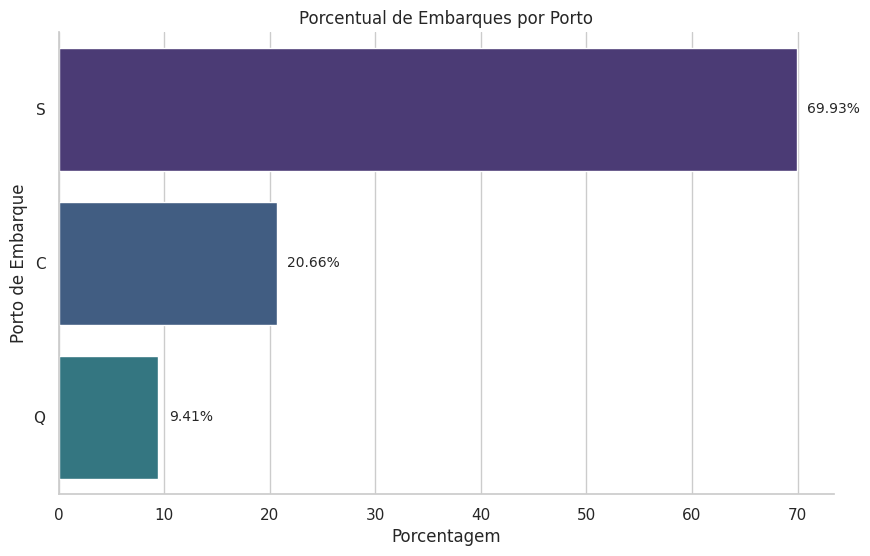

In [ ]:
questao1(df3)

## **2 - Um gráfico apresentando o percentual e o número de pessoas no navio por classe**

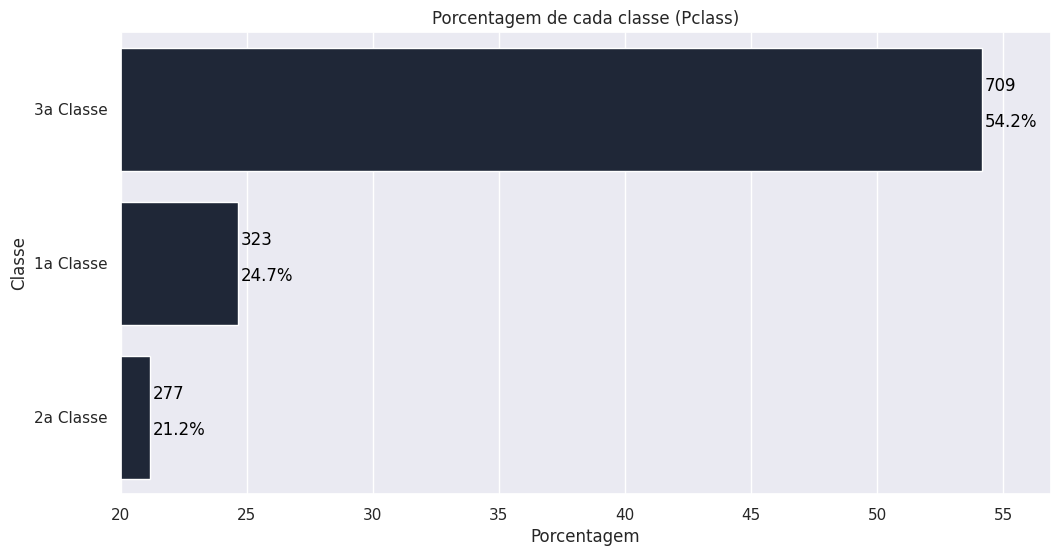

In [ ]:
# Calcule a porcentagem e o valor total de cada classe
class_counts = df3['Pclass'].value_counts()
class_percentage = class_counts / class_counts.sum() * 100

# Configuração do estilo do Seaborn e definição das cores personalizadas
sns.set_style("darkgrid", {"axes.grid": True, 'grid.linewidth': 1.2})
cores_personalizadas = ['#1b263b', '#415a77', '#778da9']
sns.set_palette(cores_personalizadas)

# Crie o gráfico de barras horizontais usando o Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=class_percentage.values, y=class_percentage.index, orient='h')

# Adicione rótulos ao gráfico
plt.xlabel('Porcentagem')
plt.ylabel('Classe')
plt.title('Porcentagem de cada classe (Pclass)')

# Adicione os valores das porcentagens e totais nas barras
for i, (percent, total) in enumerate(zip(class_percentage.values, class_counts.values)):
    text = f'{total}'
    ax.text(percent + 0.1, i-0.15, text, color='black', ha='left', va='center')

for i, (percent, total) in enumerate(zip(class_percentage.values, class_counts.values)):
    text = f'{percent:.1f}%\n'  # Add a new line
    ax.text(percent + 0.1, i+0.15, text, color='black', ha='left', va='center')
plt.xlim(20)
# Exiba o gráfico
plt.show()

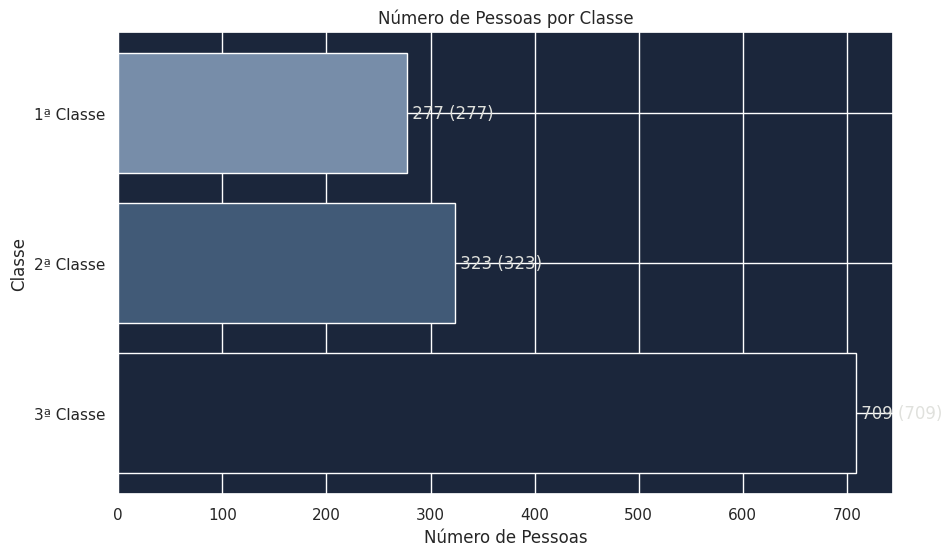

In [ ]:
questao2(df3)

## **3 - Um gráfico apresentando o número de irmãos e cônjuges a bordo do Navio**

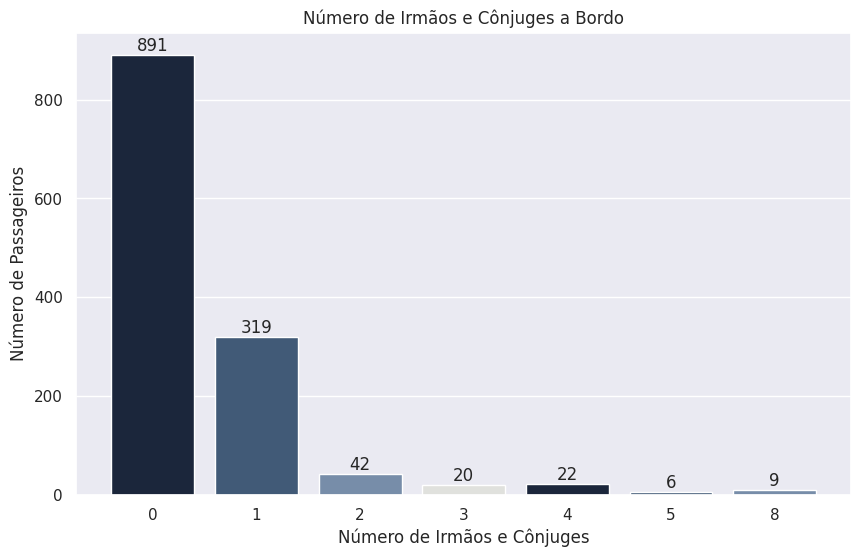

In [ ]:
questao3(df3)

## **4 - Um gráfico apresentando o número de pais e filhos a bordo do Navio**

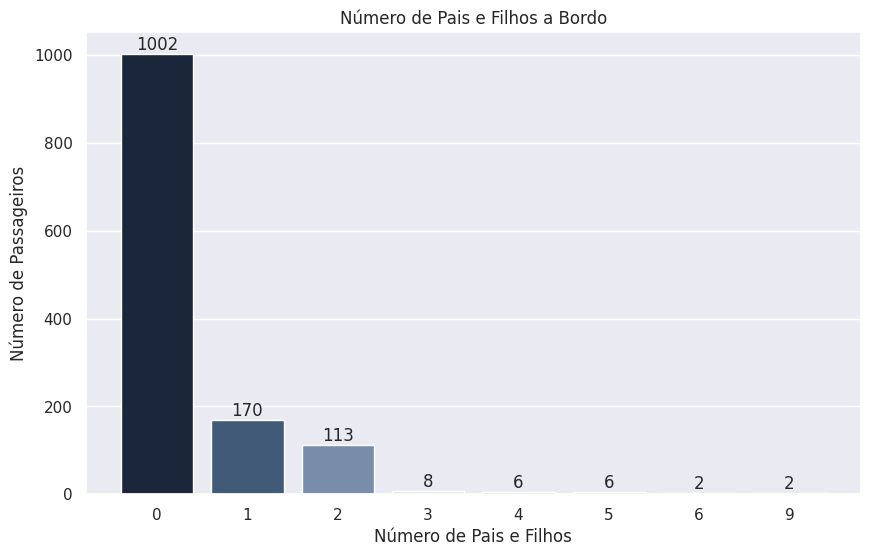

In [ ]:
questao4(df3)

## **5 - Um gráfico apresentando o número de passageiros por idade em conjunto com a média por idade**

In [ ]:
missing_age_values = df3['Age'][df3['Age'].isna()].values
for i in range(len(missing_age_values)):
    missing_age_values[i] = -2

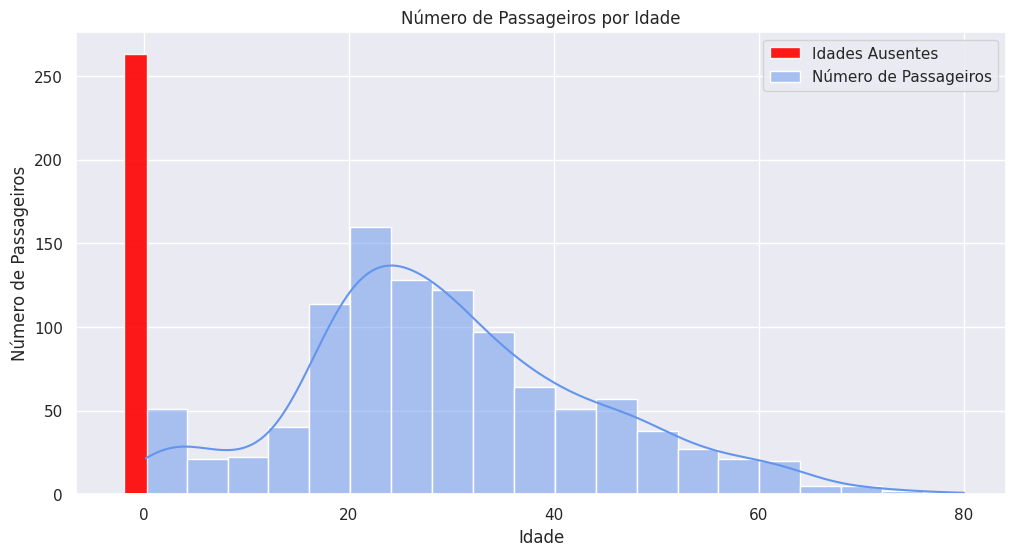

In [ ]:
questao5(df3 ,missing_age_values)

## **6 - Dois gráficos apresentando o número de passageiros e percentual dos que sobreviveram ou não. E, outro com o número dos que sobreviveriam ou morreriam baseado nas sugestões que vocês encontraram**

Neste caso, juntamos ambos os dados em um grafico só para melhor visualização dos dados

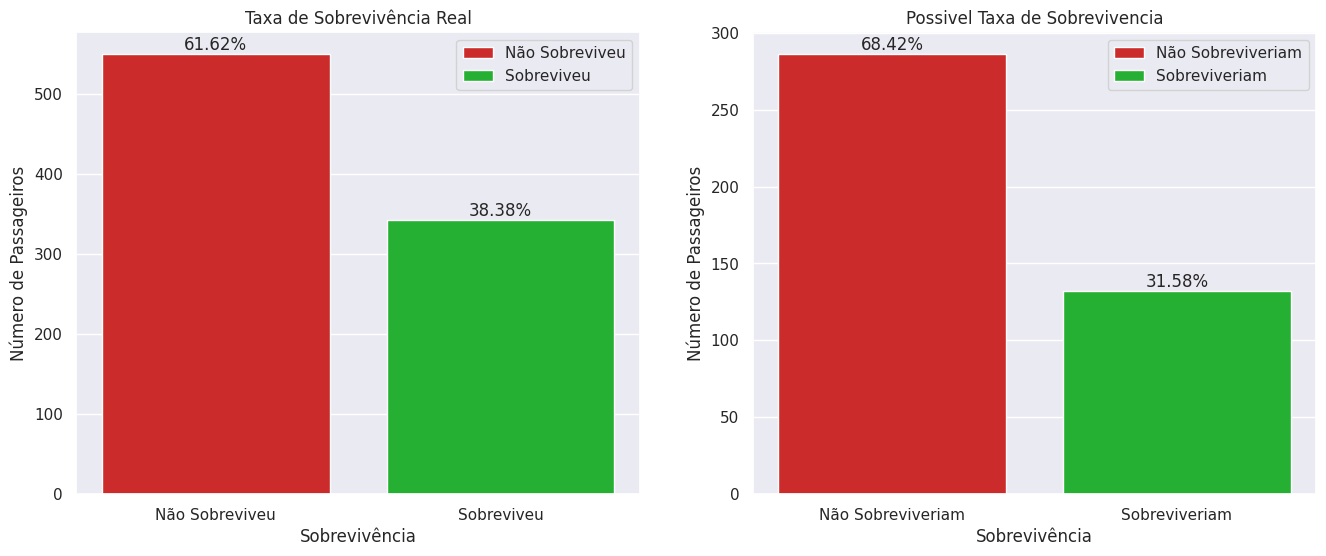

In [ ]:
questao6(df, dfSaida)

## **7 - Dois gráficos um deles apresentando o número de passageiros e o percentual que sobreviveram ou não por classe. E, outro com o número dos que sobreviveriam ou morreriam baseado nas sugestões que vocês encontraram!**

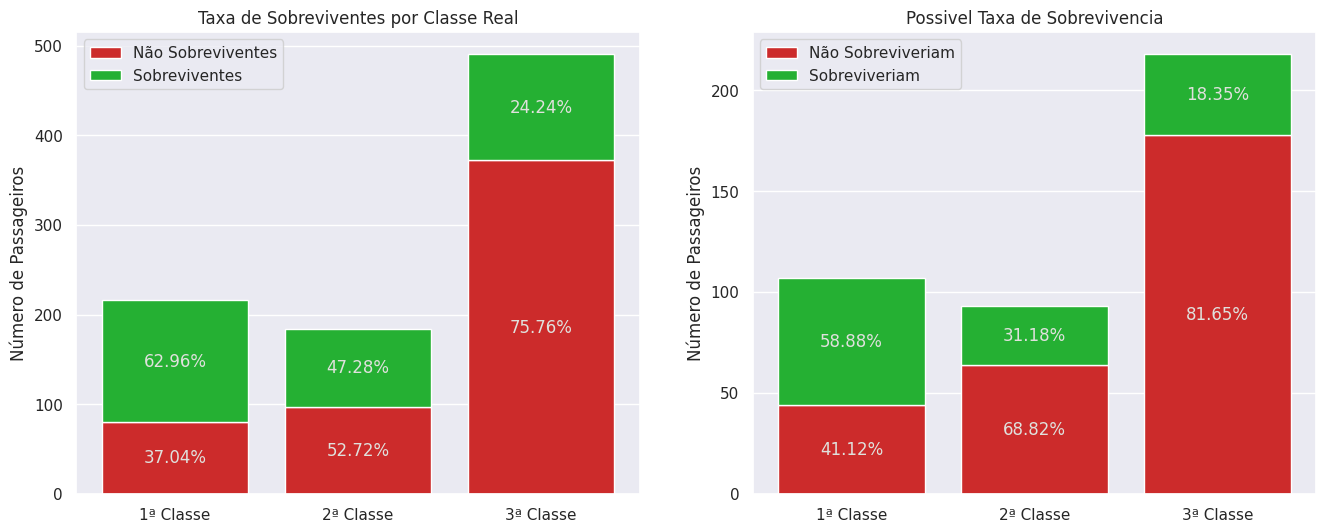

In [ ]:
questao7(df, dfSaida)

## **8 - Dois gráficos o primeiro deles apresentando o número de passageiros e percentual que sobreviveram ou não por sexo. E, outro com o número dos que sobreviveriam ou morreriam baseado nas sugestões que vocês encontraram!**

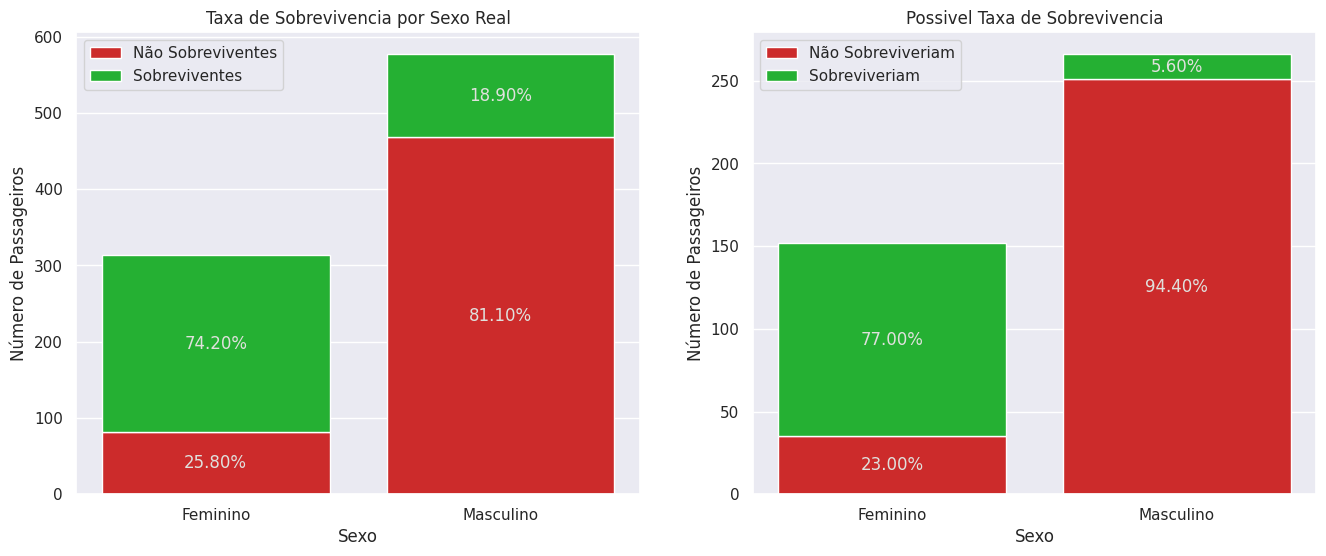

In [ ]:
questao8(df, dfSaida)

#**Questão 9**


In [ ]:
def categorize_age(age):
    if age < 18:
        return 'Criança/Adolescente (até 18)'
    elif age < 36:
        return 'Adulto (até 36)'
    else:
        return 'Adulto (+36)'

df['Age_Category'] = df['Age'].map(categorize_age)
dfSaida['Age_Category'] = dfSaida['Age'].map(categorize_age)

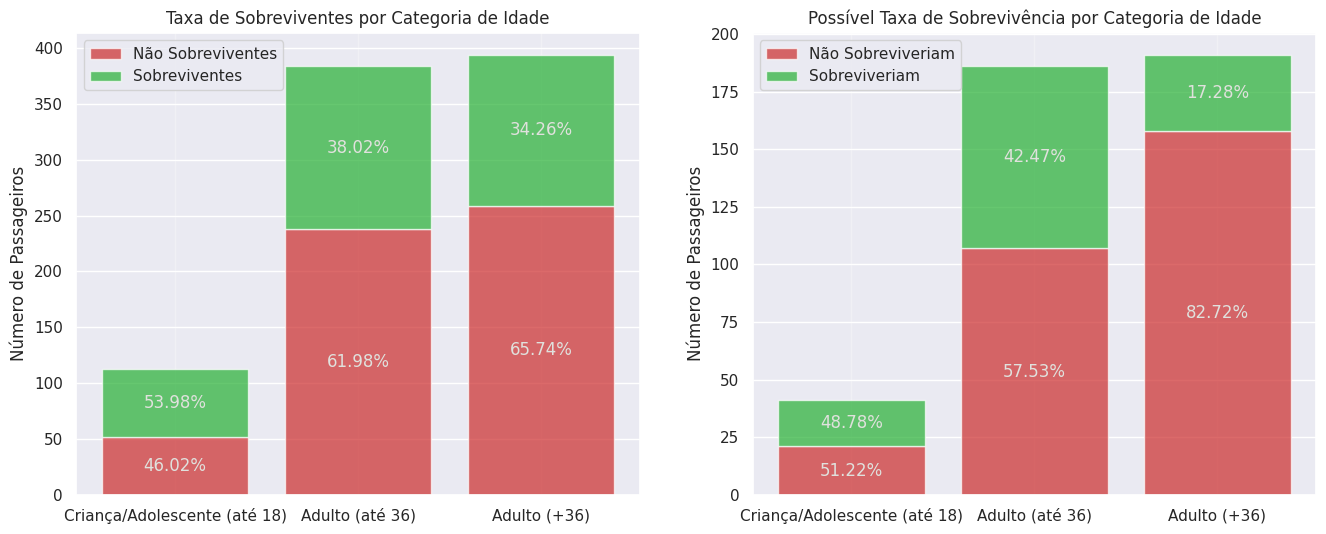

In [ ]:
questao9(df, dfSaida)

#**Conclusão**

Ao analisar o dataframe do Titanic, podemos concluir que a classe socioeconômica, sexo e idade influenciaram significativamente as chances de sobrevivência dos passageiros. Geralmente, mulheres, crianças e passageiros da primeira classe tiveram maior probabilidade de sobreviver. Essas conclusões são derivadas da taxa de sobrevivência geral, distribuição por classe, idade e sexo, análise de correlações e visualizações de dados.

O valor desses dados reside na compreensão mais profunda dos padrões e fatores que influenciaram as chances de sobrevivência dos passageiros do Titanic. Ao analisar esses dados, podemos extrair insights importantes sobre questões como desigualdade social, políticas de evacuação em situações de emergência e comportamento sob estresse.